In [1]:
# импортируем библиотеки и модули

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [16]:
# загружаем и визуализируем данные
flat_df = pd.read_excel('price1.xlsx')
flat_df

,area,price
0,28,3.1
1,42,3.8
2,45,3.9
3,52,4.4
4,56,4.5
5,68,5.9
6,70,5.6
7,75,6.4
8,90,7.3


Text(0, 0.5, 'стоимость (млн.руб)')

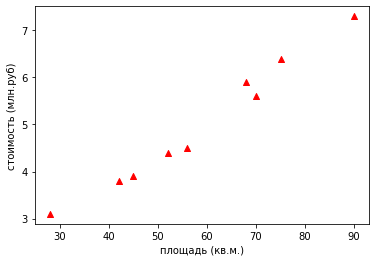

In [8]:
%matplotlib inline
plt.scatter(flat_df.area, flat_df.price,color='red', marker='^')
plt.xlabel('площадь (кв.м.)')
plt.ylabel('стоимость (млн.руб)')

In [9]:
# тренируем модель
reg = linear_model.LinearRegression() #создали модель

In [10]:
reg.fit(flat_df[['area']],flat_df.price) #обучаем модель на наших данных

LinearRegression()

In [13]:
# предсказываем
reg.predict([[120]])


array([9.38902671])

In [15]:
reg.predict(flat_df[['area']])

array([2.81264744, 3.81340081, 4.02784796, 4.52822464, 4.81415417,
       5.67194277, 5.81490754, 6.17231946, 7.24455521])

In [17]:
# Y = aX + b
reg.coef_ # коэф. "а"


array([0.07148238])

In [18]:
reg.intercept_ # коэф. "b"

0.8111407046647896

In [19]:
# Стоимость = 0.07148238 * Площадь + 0.8111407046647887

In [23]:
# проверка на 120 кв. метрах - площадь квартиры
0.07148238 * 120 + 0.8111407046647887

9.389026304664789

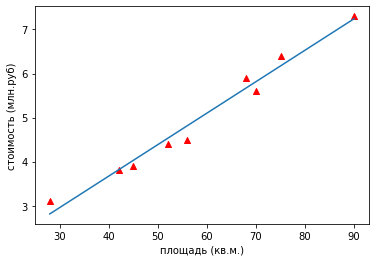

In [24]:
%matplotlib inline
plt.scatter(flat_df.area, flat_df.price,color='red', marker='^')
plt.xlabel('площадь (кв.м.)')
plt.ylabel('стоимость (млн.руб)')
plt.plot(flat_df.area,reg.predict(flat_df[['area']]) )

In [27]:
pred = pd.read_excel('prediction_price.xlsx')
pred.head( )

,area
0,25
1,37
2,40
3,58
4,61


In [31]:
p = reg.predict(pred) # предсказываем цены для новых квартир из нового файла по нашей модели
p

array([2.59820029, 3.45598889, 3.67043604, 4.95711894, 5.17156609,
       5.60046039, 5.95787231, 6.88714329, 7.67344951, 8.31679096,
       9.24606194])

In [33]:
# создаем новую колонку в файле с новыми квартирами и заносим туда предсказанные цены
pred['predicted prices'] = p
pred

,area,predicted prices
0,25,2.598200
1,37,3.455989
2,40,3.670436
3,58,4.957119
4,61,5.171566
5,67,5.600460
6,72,5.957872
7,85,6.887143
8,96,7.673450
9,105,8.316791


In [35]:
pred.to_excel('new.xlsx', index=False) # сохраняем файл в Excel без первой колонки, без индексов